In [1]:
!pip install nasdaq-data-link
import nasdaqdatalink
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
nasdaqdatalink.ApiConfig.api_key = "W7s8PDGqwk4XWwCQZps7"
db = nasdaqdatalink.Database('RATEINF')

In [2]:
db.data_fields()
ds = db.datasets()
pd.DataFrame(ds.to_list())

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,11319885,CPI_USA,RATEINF,Consumer Price Index - USA,Please visit <a href=http://www.rateinflation....,2022-10-29 02:03:46.986000+00:00,2022-09-30,1913-01-31,"[Date, Value]",monthly,Time Series,False,1034
1,11319884,CPI_GBR,RATEINF,Consumer Price Index - UK,Please visit <a href=http://www.rateinflation....,2022-10-29 02:03:46.417000+00:00,2022-09-30,1988-01-31,"[Date, Value]",monthly,Time Series,False,1034
2,11319883,CPI_CHE,RATEINF,Consumer Price Index - Switzerland,Please visit <a href=http://www.rateinflation....,2022-10-29 02:03:46.006000+00:00,2022-09-30,1983-01-31,"[Date, Value]",monthly,Time Series,False,1034
3,11319881,CPI_JPN,RATEINF,Consumer Price Index - Japan,Please visit <a href=http://www.rateinflation....,2022-10-29 02:03:46.417000+00:00,2022-09-30,1970-01-31,"[Date, Value]",monthly,Time Series,False,1034
4,11319880,CPI_ITA,RATEINF,Consumer Price Index - Italy,Please visit <a href=http://www.rateinflation....,2022-10-29 02:03:46.417000+00:00,2022-09-30,2001-01-31,"[Date, Value]",monthly,Time Series,False,1034
5,11319879,CPI_FRA,RATEINF,Consumer Price Index - France,Please visit <a href=http://www.rateinflation....,2022-10-29 02:03:46.006000+00:00,2022-09-30,1990-01-31,"[Date, Value]",monthly,Time Series,False,1034
6,11319878,CPI_EUR,RATEINF,Consumer Price Index - Euro Area,Please visit <a href=http://www.rateinflation....,2022-10-29 02:03:46.006000+00:00,2022-09-30,1990-01-31,"[Date, Value]",monthly,Time Series,False,1034
7,11319877,CPI_DEU,RATEINF,Consumer Price Index - Germany,Please visit <a href=http://www.rateinflation....,2022-10-29 02:03:46.006000+00:00,2022-09-30,1991-01-31,"[Date, Value]",monthly,Time Series,False,1034
8,11319876,CPI_CAN,RATEINF,Consumer Price Index - Canada,Please visit <a href=http://www.rateinflation....,2022-10-29 02:03:46.006000+00:00,2022-09-30,1989-01-31,"[Date, Value]",monthly,Time Series,False,1034
9,11319870,INFLATION_USA,RATEINF,Inflation YOY - USA,Please visit <a href=http://www.rateinflation....,2022-10-29 02:03:46.986000+00:00,2022-09-30,1914-01-31,"[Date, Value]",monthly,Time Series,False,1034


In [3]:
import pandas as pd
tables = [f"RATEINF/{region}" for region in pd.DataFrame(ds.to_list())[1].to_list()]
tables.sort()
tables

['RATEINF/CPI_ARG',
 'RATEINF/CPI_AUS',
 'RATEINF/CPI_CAN',
 'RATEINF/CPI_CHE',
 'RATEINF/CPI_DEU',
 'RATEINF/CPI_EUR',
 'RATEINF/CPI_FRA',
 'RATEINF/CPI_GBR',
 'RATEINF/CPI_ITA',
 'RATEINF/CPI_JPN',
 'RATEINF/CPI_NZL',
 'RATEINF/CPI_RUS',
 'RATEINF/CPI_USA',
 'RATEINF/INFLATION_ARG',
 'RATEINF/INFLATION_AUS',
 'RATEINF/INFLATION_CAN',
 'RATEINF/INFLATION_CHE',
 'RATEINF/INFLATION_DEU',
 'RATEINF/INFLATION_EUR',
 'RATEINF/INFLATION_FRA',
 'RATEINF/INFLATION_GBR',
 'RATEINF/INFLATION_ITA',
 'RATEINF/INFLATION_JPN',
 'RATEINF/INFLATION_NZL',
 'RATEINF/INFLATION_RUS',
 'RATEINF/INFLATION_USA']

In [10]:
data_cpi = []
data_inflation = []
for region in tables:
  df_tmp = nasdaqdatalink.get(region, paginate=True)
  df_tmp.columns = [region.split('/')[-1]]
  if 'RATEINF/INFLATION_USA' in region:
    data_cpi.append(df_tmp)
  else:
    data_inflation.append(df_tmp)
    

In [15]:
data_cpi

[            INFLATION_USA
 Date                     
 1914-01-31          2.041
 1914-02-28          1.020
 1914-03-31          1.020
 1914-04-30          0.000
 1914-05-31          2.062
 ...                   ...
 2022-05-31          8.582
 2022-06-30          9.060
 2022-07-31          8.525
 2022-08-31          8.263
 2022-09-30          8.202
 
 [1305 rows x 1 columns]]

<AxesSubplot:xlabel='Date'>

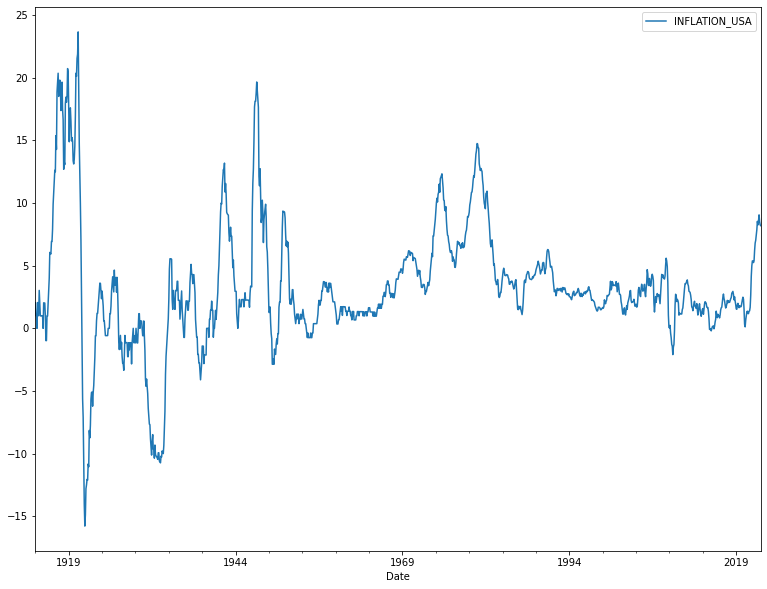

In [58]:
pd.concat(data_cpi).sort_index().ffill().plot(figsize=(13, 10))